In [1]:
import os
import numpy as np
from six.moves import cPickle
import matplotlib.pyplot as plt
import helper

In [4]:

num_trials = 10
model_names = ['task2-cnn-shallow', 'task2-cnn-deep']# deep', 'cnn-25', 'cnn-4'] #
activations = ['relu', 'exponential', 'sigmoid', 'tanh', 'softplus', 'linear', ]

results_path = os.path.join('../results', 'synthetic_code')
params_path = os.path.join(results_path, 'params')
save_path = os.path.join('..', 'scores')

In [5]:

# load data
data_path = '../data/Synthetic_code_dataset.h5'
data = helper.load_dataset(data_path)
x_train, y_train, x_valid, y_valid, x_test, y_test = data

# load ground truth values
test_model = helper.load_synthetic_models(data_path, dataset='test')
true_index = np.where(y_test[:,0] == 1)[0]
X = x_test[true_index][:500]
X_model = test_model[true_index][:500]

In [6]:

# save results
file_path = os.path.join(results_path, 'attr_results.pickle')
with open(file_path, 'rb') as f:
    results2 = cPickle.load(f)
    

In [7]:
results2.keys()

dict_keys(['task2-cnn-shallow_relu', 'task2-cnn-shallow_exponential', 'task2-cnn-shallow_sigmoid', 'task2-cnn-shallow_tanh', 'task2-cnn-shallow_softplus', 'task2-cnn-shallow_linear', 'task2-cnn-shallow_elu', 'task2-cnn-deep_relu', 'task2-cnn-deep_exponential', 'task2-cnn-deep_sigmoid', 'task2-cnn-deep_tanh', 'task2-cnn-deep_softplus', 'task2-cnn-deep_linear', 'task2-cnn-deep_elu'])

In [8]:

num_trials = 5
model_names = ['task2-cnn-shallow', 'task2-cnn-deep']# deep', 'cnn-25', 'cnn-4'] #
activations = ['exp_relu', 'shift_scale_tanh', 'shift_scale_sigmoid', 'shift_scale_relu']

results_path = os.path.join('../results', 'synthetic_code')
params_path = os.path.join(results_path, 'params')
save_path = os.path.join('..', 'scores')

score_names = ['saliency_scores1', 'saliency_scores2', 'mut_scores1', 
         'mut_scores2', 'smoothgrad_scores', 'integrated_scores', 'shap_scores']

results = {}
for model_name in model_names:
    for activation in activations:
        name = model_name+'_'+activation
        print(name)
        results[name] = {}
            
        file_path = os.path.join(save_path, name+'.pickle')
        with open(file_path, 'rb') as f:            
            scores = cPickle.load(f)
            
        shap_roc = []
        shap_pr = []
        for trial in range(num_trials):
            trial_scores = scores[trial] * X
            roc_score, pr_score = helper.interpretability_performance(X, trial_scores, X_model)
            shap_roc.append(np.mean(roc_score))
            shap_pr.append(np.mean(pr_score))    

        results[name] = [np.array(shap_roc), np.array(shap_pr)]
        print('%s: %.4f+/-%.4f\t'%(name, 
                                   np.mean(results[name][0]), 
                                   np.std(results[name][0]))) 

            

task2-cnn-shallow_exp_relu
task2-cnn-shallow_exp_relu: 0.7765+/-0.0189	
task2-cnn-shallow_shift_scale_tanh
task2-cnn-shallow_shift_scale_tanh: 0.8150+/-0.0188	
task2-cnn-shallow_shift_scale_sigmoid
task2-cnn-shallow_shift_scale_sigmoid: 0.8214+/-0.0117	
task2-cnn-shallow_shift_scale_relu
task2-cnn-shallow_shift_scale_relu: 0.8236+/-0.0121	
task2-cnn-deep_exp_relu
task2-cnn-deep_exp_relu: 0.7454+/-0.0253	
task2-cnn-deep_shift_scale_tanh
task2-cnn-deep_shift_scale_tanh: 0.8128+/-0.0203	
task2-cnn-deep_shift_scale_sigmoid
task2-cnn-deep_shift_scale_sigmoid: 0.8392+/-0.0210	
task2-cnn-deep_shift_scale_relu
task2-cnn-deep_shift_scale_relu: 0.7902+/-0.0566	


In [10]:

for model_name in model_names:
    for activation in activations:
        name = model_name+'_'+activation
        print('%s: %.4f+/-%.4f\t'%(name, 
                                   np.mean(results[name][1]), 
                                   np.std(results[name][1]))) 

task2-cnn-shallow_exp_relu: 0.5990+/-0.0377	
task2-cnn-shallow_shift_scale_tanh: 0.6900+/-0.0386	
task2-cnn-shallow_shift_scale_sigmoid: 0.7100+/-0.0179	
task2-cnn-shallow_shift_scale_relu: 0.7107+/-0.0157	
task2-cnn-deep_exp_relu: 0.6159+/-0.0317	
task2-cnn-deep_shift_scale_tanh: 0.6829+/-0.0224	
task2-cnn-deep_shift_scale_sigmoid: 0.7372+/-0.0324	
task2-cnn-deep_shift_scale_relu: 0.6662+/-0.0756	


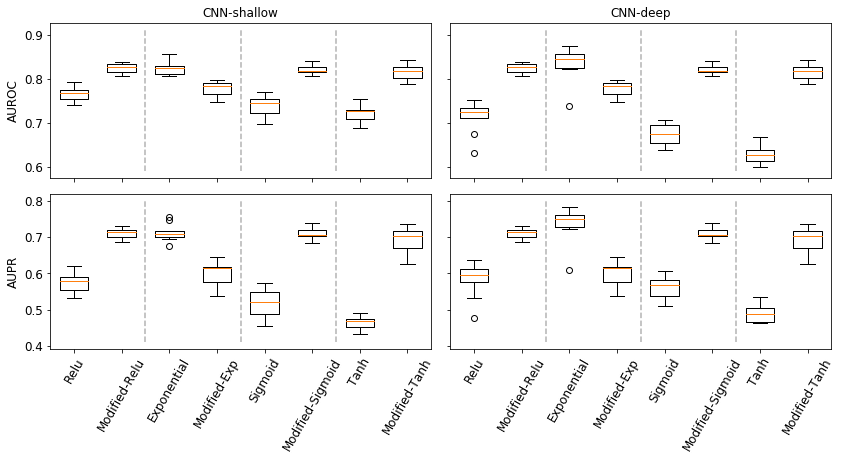

In [15]:

plot_activations =  ['Relu', 'Modified-Relu', 'Exponential', 'Modified-Exp', 'Sigmoid', 'Modified-Sigmoid', 'Tanh', 
                     'Modified-Tanh']

fig = plt.figure(figsize=(14,6))
plt.subplots_adjust(wspace=0.05, hspace=.1)
ax = plt.subplot(2,2,1)
score_name = 'saliency_scores1'
model_name = 'task2-cnn-shallow'
vals = [results2[model_name+'_relu']['saliency_scores1'][0], 
        results['task2-cnn-shallow_shift_scale_relu'][0],
        results2[model_name+'_exponential']['saliency_scores1'][0], 
        results['task2-cnn-shallow_exp_relu'][0],
        results2[model_name+'_sigmoid']['saliency_scores1'][0],
        results['task2-cnn-shallow_shift_scale_sigmoid'][0],  
        results2[model_name+'_tanh']['saliency_scores1'][0], 
        results['task2-cnn-shallow_shift_scale_tanh'][0]
       ]
ax.boxplot(vals,  widths = 0.6);
plt.ylabel('AUROC', fontsize=12)
plt.yticks([0.6, 0.7, 0.8, 0.9], fontsize=12)
plt.xticks(np.linspace(1,9,9), plot_activations, fontsize=12, rotation=60)
ax.set_ybound([.59,0.90])
ax.set_xbound([.5,8.5])
plt.vlines(2.5, .59, 0.91, linestyle='--', alpha=0.3)
plt.vlines(4.5, .59, 0.91, linestyle='--', alpha=0.3)
plt.vlines(6.5, .59, 0.91, linestyle='--', alpha=0.3)
ax.tick_params(labelbottom=False) 

plt.title('CNN-shallow', fontsize=12)

ax = plt.subplot(2,2,2)
score_name = 'saliency_scores1'
model_name = 'task2-cnn-deep'
vals = [results2[model_name+'_relu']['saliency_scores1'][0], 
        results['task2-cnn-shallow_shift_scale_relu'][0],
        results2[model_name+'_exponential']['saliency_scores1'][0], 
        results['task2-cnn-shallow_exp_relu'][0],
        results2[model_name+'_sigmoid']['saliency_scores1'][0],
        results['task2-cnn-shallow_shift_scale_sigmoid'][0],  
        results2[model_name+'_tanh']['saliency_scores1'][0], 
        results['task2-cnn-shallow_shift_scale_tanh'][0]
       ]
ax.boxplot(vals,  widths = 0.6);
#plt.ylabel('AUROC', fontsize=12)
#plt.yticks([0.6, 0.7, 0.8, 0.9], fontsize=12)
plt.xticks(np.linspace(1,9,9), plot_activations, fontsize=12, rotation=60)
ax.set_ybound([.59,0.90])
ax.set_xbound([.5,8.5])
ax.tick_params(labelleft=False) 
ax.tick_params(labelbottom=False) 
plt.title('CNN-deep', fontsize=12)
plt.vlines(2.5, .59, 0.91, linestyle='--', alpha=0.3)
plt.vlines(4.5, .59, 0.91, linestyle='--', alpha=0.3)
plt.vlines(6.5, .59, 0.91, linestyle='--', alpha=0.3)

ax = plt.subplot(2,2,3)
score_name = 'saliency_scores1'
model_name = 'task2-cnn-shallow'
vals = [results2[model_name+'_relu']['saliency_scores1'][1], 
        results['task2-cnn-shallow_shift_scale_relu'][1],
        results2[model_name+'_exponential']['saliency_scores1'][1], 
        results['task2-cnn-shallow_exp_relu'][1],
        results2[model_name+'_sigmoid']['saliency_scores1'][1],
        results['task2-cnn-shallow_shift_scale_sigmoid'][1],  
        results2[model_name+'_tanh']['saliency_scores1'][1], 
        results['task2-cnn-shallow_shift_scale_tanh'][1]
       ]
ax.boxplot(vals,  widths = 0.6);
plt.ylabel('AUPR', fontsize=12)
plt.yticks([0.4, 0.5, 0.6, 0.7, 0.8, 0.9], fontsize=12)
plt.xticks(np.linspace(1,9,9), plot_activations, fontsize=12, rotation=60)
ax.set_ybound([.59,0.8])
ax.set_xbound([.5,8.5])
plt.vlines(2.5, .41, 0.8, linestyle='--', alpha=0.3)
plt.vlines(4.5, .41, 0.8, linestyle='--', alpha=0.3)
plt.vlines(6.5, .41, 0.8, linestyle='--', alpha=0.3)

ax = plt.subplot(2,2,4)
score_name = 'saliency_scores1'
model_name = 'task2-cnn-deep'
vals = [results2[model_name+'_relu']['saliency_scores1'][1], 
        results['task2-cnn-shallow_shift_scale_relu'][1],
        results2[model_name+'_exponential']['saliency_scores1'][1], 
        results['task2-cnn-shallow_exp_relu'][1],
        results2[model_name+'_sigmoid']['saliency_scores1'][1],
        results['task2-cnn-shallow_shift_scale_sigmoid'][1],  
        results2[model_name+'_tanh']['saliency_scores1'][1], 
        results['task2-cnn-shallow_shift_scale_tanh'][1]
       ]
ax.boxplot(vals,  widths = 0.6);
#plt.ylabel('AUpr', fontsize=12)
#plt.yticks([0.4, 0.5, 0.6, 0.7, 0.8, 0.9], fontsize=12)
plt.xticks(np.linspace(1,9,9), plot_activations, fontsize=12, rotation=60)
ax.set_ybound([.59,0.8])
ax.set_xbound([.5,8.5])
ax.tick_params(labelleft=False) 
plt.vlines(2.5, .41, 0.8, linestyle='--', alpha=0.3)
plt.vlines(4.5, .41, 0.8, linestyle='--', alpha=0.3)
plt.vlines(6.5, .41, 0.8, linestyle='--', alpha=0.3)

outfile = os.path.join(results_path, 'task2_compare_attr_score_other.pdf')
fig.savefig(outfile, format='pdf', dpi=200, bbox_inches='tight')


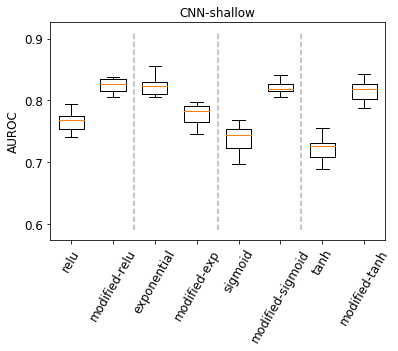

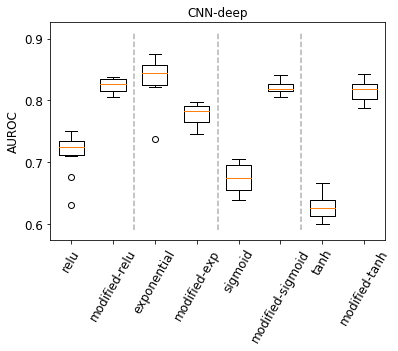

In [9]:

plot_activations =  ['relu', 'modified-relu', 'exponential', 'modified-exp', 'sigmoid', 'modified-sigmoid', 'tanh', 
                     'modified-tanh']
fig = plt.figure()
ax = plt.subplot(111)
score_name = 'saliency_scores1'
model_name = 'task2-cnn-shallow'
vals = [results2[model_name+'_relu']['saliency_scores1'][0], 
        results['task2-cnn-shallow_shift_scale_relu'][0],
        results2[model_name+'_exponential']['saliency_scores1'][0], 
        results['task2-cnn-shallow_exp_relu'][0],
        results2[model_name+'_sigmoid']['saliency_scores1'][0],
        results['task2-cnn-shallow_shift_scale_sigmoid'][0],  
        results2[model_name+'_tanh']['saliency_scores1'][0], 
        results['task2-cnn-shallow_shift_scale_tanh'][0]
       ]
ax.boxplot(vals,  widths = 0.6);
plt.ylabel('AUROC', fontsize=12)
plt.yticks([0.6, 0.7, 0.8, 0.9], fontsize=12)
plt.xticks(np.linspace(1,9,9), plot_activations, fontsize=12, rotation=60)
ax.set_ybound([.59,0.90])
ax.set_xbound([.5,8.5])
plt.vlines(2.5, .59, 0.91, linestyle='--', alpha=0.3)
plt.vlines(4.5, .59, 0.91, linestyle='--', alpha=0.3)
plt.vlines(6.5, .59, 0.91, linestyle='--', alpha=0.3)
plt.title('CNN-shallow', fontsize=12)
outfile = os.path.join(results_path, 'task2_compare_attr_score_other1')
fig.savefig(outfile, format='pdf', dpi=200, bbox_inches='tight')

fig = plt.figure()
ax = plt.subplot(111)
score_name = 'saliency_scores1'
model_name = 'task2-cnn-deep'
vals = [results2[model_name+'_relu']['saliency_scores1'][0], 
        results['task2-cnn-shallow_shift_scale_relu'][0],
        results2[model_name+'_sigmoid']['saliency_scores1'][0],
        results['task2-cnn-shallow_shift_scale_sigmoid'][0],  
        results2[model_name+'_tanh']['saliency_scores1'][0], 
        results['task2-cnn-shallow_shift_scale_tanh'][0]
        results2[model_name+'_exponential']['saliency_scores1'][0], 
        results['task2-cnn-shallow_exp_relu'][0],
       ]
ax.boxplot(vals,  widths = 0.6);
plt.ylabel('AUROC', fontsize=12)
plt.yticks([0.6, 0.7, 0.8, 0.9], fontsize=12)
plt.xticks(np.linspace(1,9,9), plot_activations, fontsize=12, rotation=60)
ax.set_ybound([.59,0.90])
ax.set_xbound([.5,8.5])
#ax.tick_params(labelleft=False) 
plt.title('CNN-deep', fontsize=12)
plt.vlines(2.5, .59, 0.91, linestyle='--', alpha=0.3)
plt.vlines(4.5, .59, 0.91, linestyle='--', alpha=0.3)
plt.vlines(6.5, .59, 0.91, linestyle='--', alpha=0.3)

outfile = os.path.join(results_path, 'task2_compare_attr_score_other2.pdf')
fig.savefig(outfile, format='pdf', dpi=200, bbox_inches='tight')


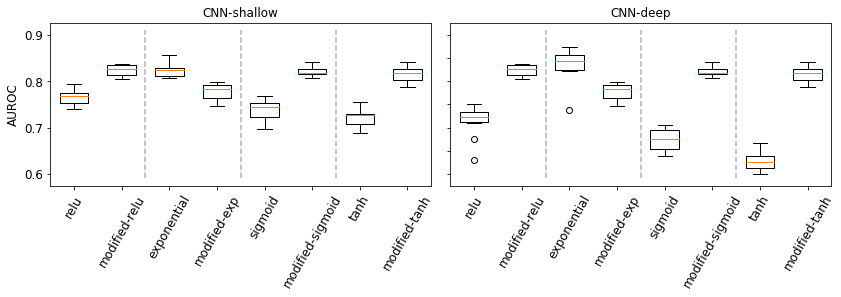

In [8]:

plot_activations =  ['relu', 'modified-relu', 'exponential', 'modified-exp', 'sigmoid', 'modified-sigmoid', 'tanh', 
                     'modified-tanh']

fig = plt.figure(figsize=(14,3))
plt.subplots_adjust(wspace=0.05, hspace=None)
ax = plt.subplot(1,2,1)
score_name = 'saliency_scores1'
model_name = 'task2-cnn-shallow'
vals = [results2[model_name+'_relu']['saliency_scores1'][0], 
        results['task2-cnn-shallow_shift_scale_relu'][0],
        results2[model_name+'_exponential']['saliency_scores1'][0], 
        results['task2-cnn-shallow_exp_relu'][0],
        results2[model_name+'_sigmoid']['saliency_scores1'][0],
        results['task2-cnn-shallow_shift_scale_sigmoid'][0],  
        results2[model_name+'_tanh']['saliency_scores1'][0], 
        results['task2-cnn-shallow_shift_scale_tanh'][0]
       ]
ax.boxplot(vals,  widths = 0.6);
plt.ylabel('AUROC', fontsize=12)
plt.yticks([0.6, 0.7, 0.8, 0.9], fontsize=12)
plt.xticks(np.linspace(1,9,9), plot_activations, fontsize=12, rotation=60)
ax.set_ybound([.59,0.90])
ax.set_xbound([.5,8.5])
plt.vlines(2.5, .59, 0.91, linestyle='--', alpha=0.3)
plt.vlines(4.5, .59, 0.91, linestyle='--', alpha=0.3)
plt.vlines(6.5, .59, 0.91, linestyle='--', alpha=0.3)

plt.title('CNN-shallow', fontsize=12)

ax = plt.subplot(1,2,2)
score_name = 'saliency_scores1'
model_name = 'task2-cnn-deep'
vals = [results2[model_name+'_relu']['saliency_scores1'][0], 
        results['task2-cnn-shallow_shift_scale_relu'][0],
        results2[model_name+'_exponential']['saliency_scores1'][0], 
        results['task2-cnn-shallow_exp_relu'][0],
        results2[model_name+'_sigmoid']['saliency_scores1'][0],
        results['task2-cnn-shallow_shift_scale_sigmoid'][0],  
        results2[model_name+'_tanh']['saliency_scores1'][0], 
        results['task2-cnn-shallow_shift_scale_tanh'][0]
       ]
ax.boxplot(vals,  widths = 0.6);
#plt.ylabel('AUROC', fontsize=12)
#plt.yticks([0.6, 0.7, 0.8, 0.9], fontsize=12)
plt.xticks(np.linspace(1,9,9), plot_activations, fontsize=12, rotation=60)
ax.set_ybound([.59,0.90])
ax.set_xbound([.5,8.5])
ax.tick_params(labelleft=False) 
plt.title('CNN-deep', fontsize=12)
plt.vlines(2.5, .59, 0.91, linestyle='--', alpha=0.3)
plt.vlines(4.5, .59, 0.91, linestyle='--', alpha=0.3)
plt.vlines(6.5, .59, 0.91, linestyle='--', alpha=0.3)

outfile = os.path.join(results_path, 'task2_compare_attr_score_other')
fig.savefig(outfile, format='pdf', dpi=200, bbox_inches='tight')


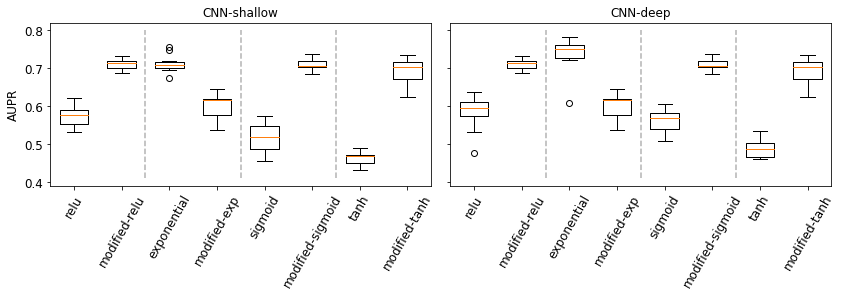

In [56]:

plot_activations =  ['relu', 'modified-relu', 'exponential', 'modified-exp', 'sigmoid', 'modified-sigmoid', 'tanh', 
                     'modified-tanh']

fig = plt.figure(figsize=(14,3))
plt.subplots_adjust(wspace=0.05, hspace=None)
ax = plt.subplot(1,2,1)
score_name = 'saliency_scores1'
model_name = 'task2-cnn-shallow'
vals = [results2[model_name+'_relu']['saliency_scores1'][1], 
        results['task2-cnn-shallow_shift_scale_relu'][1],
        results2[model_name+'_exponential']['saliency_scores1'][1], 
        results['task2-cnn-shallow_exp_relu'][1],
        results2[model_name+'_sigmoid']['saliency_scores1'][1],
        results['task2-cnn-shallow_shift_scale_sigmoid'][1],  
        results2[model_name+'_tanh']['saliency_scores1'][1], 
        results['task2-cnn-shallow_shift_scale_tanh'][1]
       ]
ax.boxplot(vals,  widths = 0.6);
plt.ylabel('AUPR', fontsize=12)
plt.yticks([0.4, 0.5, 0.6, 0.7, 0.8, 0.9], fontsize=12)
plt.xticks(np.linspace(1,9,9), plot_activations, fontsize=12, rotation=60)
ax.set_ybound([.59,0.8])
ax.set_xbound([.5,8.5])
plt.vlines(2.5, .41, 0.8, linestyle='--', alpha=0.3)
plt.vlines(4.5, .41, 0.8, linestyle='--', alpha=0.3)
plt.vlines(6.5, .41, 0.8, linestyle='--', alpha=0.3)

plt.title('CNN-shallow', fontsize=12)

ax = plt.subplot(1,2,2)
score_name = 'saliency_scores1'
model_name = 'task2-cnn-deep'
vals = [results2[model_name+'_relu']['saliency_scores1'][1], 
        results['task2-cnn-shallow_shift_scale_relu'][1],
        results2[model_name+'_exponential']['saliency_scores1'][1], 
        results['task2-cnn-shallow_exp_relu'][1],
        results2[model_name+'_sigmoid']['saliency_scores1'][1],
        results['task2-cnn-shallow_shift_scale_sigmoid'][1],  
        results2[model_name+'_tanh']['saliency_scores1'][1], 
        results['task2-cnn-shallow_shift_scale_tanh'][1]
       ]
ax.boxplot(vals,  widths = 0.6);
#plt.ylabel('AUpr', fontsize=12)
#plt.yticks([0.4, 0.5, 0.6, 0.7, 0.8, 0.9], fontsize=12)
plt.xticks(np.linspace(1,9,9), plot_activations, fontsize=12, rotation=60)
ax.set_ybound([.59,0.8])
ax.set_xbound([.5,8.5])
ax.tick_params(labelleft=False) 
plt.title('CNN-deep', fontsize=12)
plt.vlines(2.5, .41, 0.8, linestyle='--', alpha=0.3)
plt.vlines(4.5, .41, 0.8, linestyle='--', alpha=0.3)
plt.vlines(6.5, .41, 0.8, linestyle='--', alpha=0.3)

outfile = os.path.join(results_path, 'task2_compare_attr_score_other_pr')
fig.savefig(outfile, format='pdf', dpi=200, bbox_inches='tight')


In [41]:
from scipy import stats

model_name = 'task2-cnn-shallow'
plot_activations =  ['relu', 'shift_scale_relu', 'exponential', 'modified-exp', 'sigmoid', 'modified-sigmoid', 'tanh', 
                     'modified-tanh']
stats.ttest_ind(results2[model_name+'_exponential']['saliency_scores1'][0], 
                results[model_name+'_shift_scale_relu'][0]).pvalue

0.9176430793361061

# sweep

In [13]:

num_trials = 5
model_names = ['task2-cnn-shallow', 'task2-cnn-deep']# deep', 'cnn-25', 'cnn-4'] #
activations = ['shift_sigmoid5', 'shift_sigmoid4', 'shift_sigmoid3', 'shift_sigmoid2', 'shift_sigmoid1', 'shift_sigmoid0', 
               'shift_sigmoid_1', 'shift_sigmoid_2', 'shift_sigmoid_3', 'shift_sigmoid_4']

results_path = os.path.join('../results', 'synthetic_code')
params_path = os.path.join(results_path, 'params')
save_path = os.path.join('..', 'scores')

score_names = ['saliency_scores1', 'saliency_scores2', 'mut_scores1', 
         'mut_scores2', 'smoothgrad_scores', 'integrated_scores', 'shap_scores']

results = {}
for model_name in model_names:
    for activation in activations:
        name = model_name+'_'+activation
        results[name] = {}
            
        file_path = os.path.join(save_path, name+'.pickle')
        with open(file_path, 'rb') as f:            
            scores = cPickle.load(f)
            
        shap_roc = []
        shap_pr = []
        for trial in range(num_trials):
            trial_scores = scores[trial] * X
            roc_score, pr_score = helper.interpretability_performance(X, trial_scores, X_model)
            shap_roc.append(np.mean(roc_score))
            shap_pr.append(np.mean(pr_score))    

        results[name] = [np.array(shap_roc), np.array(shap_pr)]
        print('%s: %.4f+/-%.4f\t'%(name, 
                                   np.mean(results[name][0]), 
                                   np.std(results[name][0]))) 

            

task2-cnn-shallow_shift_sigmoid5: 0.8098+/-0.0193	
task2-cnn-shallow_shift_sigmoid4: 0.8233+/-0.0111	
task2-cnn-shallow_shift_sigmoid3: 0.8078+/-0.0087	
task2-cnn-shallow_shift_sigmoid2: 0.7778+/-0.0225	
task2-cnn-shallow_shift_sigmoid1: 0.7612+/-0.0182	
task2-cnn-shallow_shift_sigmoid0: 0.7363+/-0.0127	
task2-cnn-shallow_shift_sigmoid_1: 0.7164+/-0.0274	
task2-cnn-shallow_shift_sigmoid_2: 0.6917+/-0.0145	
task2-cnn-shallow_shift_sigmoid_3: 0.6853+/-0.0181	
task2-cnn-shallow_shift_sigmoid_4: 0.5680+/-0.0833	
task2-cnn-deep_shift_sigmoid5: 0.8484+/-0.0268	
task2-cnn-deep_shift_sigmoid4: 0.7802+/-0.0820	
task2-cnn-deep_shift_sigmoid3: 0.7131+/-0.1791	
task2-cnn-deep_shift_sigmoid2: 0.6932+/-0.0985	
task2-cnn-deep_shift_sigmoid1: 0.7337+/-0.0145	
task2-cnn-deep_shift_sigmoid0: 0.6577+/-0.0371	
task2-cnn-deep_shift_sigmoid_1: 0.6633+/-0.0230	
task2-cnn-deep_shift_sigmoid_2: 0.7001+/-0.0252	
task2-cnn-deep_shift_sigmoid_3: 0.7171+/-0.0224	
task2-cnn-deep_shift_sigmoid_4: 0.7277+/-0.0342	


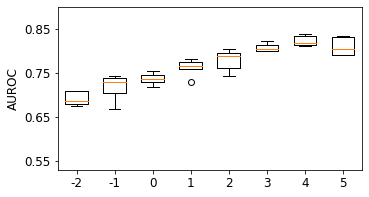

In [16]:

activations = ['shift_sigmoid5', 'shift_sigmoid4', 'shift_sigmoid3', 'shift_sigmoid2', 'shift_sigmoid1', 'shift_sigmoid0', 
               'shift_sigmoid_1', 'shift_sigmoid_2']#, 'shift_sigmoid_3', 'shift_sigmoid_4']
shift = [5, 4, 3, 2, 1, 0, -1, -2]#, -3, -4]
activations = activations[::-1]
shift = shift[::-1]

fig = plt.figure(figsize=(12,3))
ax = plt.subplot(1,2,1)
score_name = 'saliency_scores1'
model_name = 'task2-cnn-shallow'
vals = []
for activation in activations:
    vals.append(results[model_name+'_'+activation][0])  

ax.boxplot(vals,  widths = 0.6);
plt.ylabel('AUROC', fontsize=12)
plt.yticks([0.55, 0.65, 0.75, 0.85], fontsize=12)
plt.xticks(np.linspace(1,8,8), shift, fontsize=12, rotation=0)
ax.set_ybound([.53,0.90])
ax.set_xbound([.5,8.5])

outfile = os.path.join(results_path, 'task2_sigmoid_shift_sweep')
fig.savefig(outfile, format='pdf', dpi=200, bbox_inches='tight')



In [17]:

num_trials = 5
model_names = ['task2-cnn-shallow', 'task2-cnn-deep']# deep', 'cnn-25', 'cnn-4'] #
activations = ['scaled_shift_sigmoid5', 'scaled_shift_sigmoid4','scaled_shift_sigmoid3', 'scaled_shift_sigmoid2', 
               'scaled_shift_sigmoid1', 'scaled_shift_sigmoid0', 'scaled_shift_sigmoid_1', 
               'scaled_shift_sigmoid_2', 'scaled_shift_sigmoid_3', 'scaled_shift_sigmoid_4']

results_path = os.path.join('../results', 'synthetic_code')
params_path = os.path.join(results_path, 'params')
save_path = os.path.join('..', 'scores')

score_names = ['saliency_scores1', 'saliency_scores2', 'mut_scores1', 
         'mut_scores2', 'smoothgrad_scores', 'integrated_scores', 'shap_scores']

results = {}
for model_name in model_names:
    for activation in activations:
        name = model_name+'_'+activation
        results[name] = {}
            
        file_path = os.path.join(save_path, name+'.pickle')
        with open(file_path, 'rb') as f:            
            scores = cPickle.load(f)
            
        shap_roc = []
        shap_pr = []
        for trial in range(num_trials):
            trial_scores = scores[trial] * X
            roc_score, pr_score = helper.interpretability_performance(X, trial_scores, X_model)
            shap_roc.append(np.mean(roc_score))
            shap_pr.append(np.mean(pr_score))    

        results[name] = [np.array(shap_roc), np.array(shap_pr)]
        print('%s: %.4f+/-%.4f\t'%(name, 
                                   np.mean(results[name][0]), 
                                   np.std(results[name][0]))) 

            

task2-cnn-shallow_scaled_shift_sigmoid5: 0.8026+/-0.0211	
task2-cnn-shallow_scaled_shift_sigmoid4: 0.8159+/-0.0095	
task2-cnn-shallow_scaled_shift_sigmoid3: 0.7966+/-0.0110	
task2-cnn-shallow_scaled_shift_sigmoid2: 0.7788+/-0.0138	
task2-cnn-shallow_scaled_shift_sigmoid1: 0.7489+/-0.0203	
task2-cnn-shallow_scaled_shift_sigmoid0: 0.7299+/-0.0160	
task2-cnn-shallow_scaled_shift_sigmoid_1: 0.7007+/-0.0119	
task2-cnn-shallow_scaled_shift_sigmoid_2: 0.6783+/-0.0203	
task2-cnn-shallow_scaled_shift_sigmoid_3: 0.5892+/-0.0770	
task2-cnn-shallow_scaled_shift_sigmoid_4: 0.7031+/-0.0133	
task2-cnn-deep_scaled_shift_sigmoid5: 0.7914+/-0.0908	
task2-cnn-deep_scaled_shift_sigmoid4: 0.7435+/-0.1372	
task2-cnn-deep_scaled_shift_sigmoid3: 0.8260+/-0.0195	
task2-cnn-deep_scaled_shift_sigmoid2: 0.7734+/-0.0537	
task2-cnn-deep_scaled_shift_sigmoid1: 0.7097+/-0.0326	
task2-cnn-deep_scaled_shift_sigmoid0: 0.6448+/-0.0377	
task2-cnn-deep_scaled_shift_sigmoid_1: 0.6744+/-0.0167	
task2-cnn-deep_scaled_shift_si

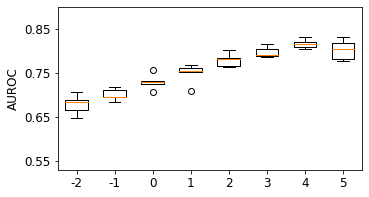

In [18]:

activations = ['scaled_shift_sigmoid5', 'scaled_shift_sigmoid4','scaled_shift_sigmoid3', 'scaled_shift_sigmoid2', 
               'scaled_shift_sigmoid1', 'scaled_shift_sigmoid0', 'scaled_shift_sigmoid_1', 
               'scaled_shift_sigmoid_2']#, 'scaled_shift_sigmoid_3', 'scaled_shift_sigmoid_4']
shift = [5, 4, 3, 2, 1, 0, -1, -2, ]
activations = activations[::-1]
shift = shift[::-1]

fig = plt.figure(figsize=(12,3))
ax = plt.subplot(1,2,1)
score_name = 'saliency_scores1'
model_name = 'task2-cnn-shallow'
vals = []
for activation in activations:
    vals.append(results[model_name+'_'+activation][0])  

ax.boxplot(vals,  widths = 0.6);
plt.ylabel('AUROC', fontsize=12)
plt.yticks([0.55, 0.65, 0.75, 0.85], fontsize=12)
plt.xticks(np.linspace(1,8,8), shift, fontsize=12, rotation=0)
ax.set_ybound([.53,0.90])
ax.set_xbound([.5,8.5])

outfile = os.path.join(results_path, 'task2_sigmoid_scaled_shift_sweep')
fig.savefig(outfile, format='pdf', dpi=200, bbox_inches='tight')


# Print results table

In [13]:
score_names = ['saliency_scores1', 'mut_scores1', 'smoothgrad_scores', 
               'integrated_scores', 'shap_scores']

save_path = os.path.join(results_path, 'task2_attr_results_auroc.tsv')
with open(save_path, 'w') as f:
    for model_name in model_names:
        for activation in activations:
            name = model_name+'_'+activation
            f.write('%s\t'%(name)) 
            for score_name in score_names:
                f.write('%.4f+/-%.4f\t'%(np.mean(results[name][score_name][0]), 
                                         np.std(results[name][score_name][0])))
            f.write('\n')
            
save_path = os.path.join(results_path, 'task2_attr_results_aupr.tsv')
with open(save_path, 'w') as f:
    for model_name in model_names:
        for activation in activations:
            name = model_name+'_'+activation
            f.write('%s\t'%(name)) 
            for score_name in score_names:
                f.write('%.4f+/-%.4f\t'%(np.mean(results[name][score_name][1]), 
                                         np.std(results[name][score_name][1])))
            f.write('\n')
            
            

# Scatter plot relu vs exp

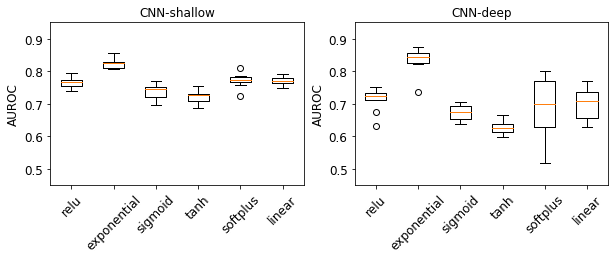

In [83]:
plt.figure(figsize=(10,3))

ax = plt.subplot(1,2,1)
score_name = 'saliency_scores1'
model_name = 'task2-cnn-shallow'
vals = []
for activation in activations:
    name = model_name+'_'+activation
    vals.append(results[name][score_name][0])
    
ax.boxplot(vals);
plt.ylabel('AUROC', fontsize=12)
plt.yticks([0.4, 0.5, 0.6, 0.7, 0.8, 0.9], fontsize=12)
plt.xticks(range(1,7), activations, fontsize=12, rotation=45)
ax.set_ybound([.45,0.95])
plt.title('CNN-shallow', fontsize=12)

ax = plt.subplot(1,2,2)
model_name = 'task2-cnn-deep'
vals2 = []
for activation in activations:
    name = model_name+'_'+activation
    vals2.append(results[name][score_name][0])
    
ax.boxplot(vals2);
plt.ylabel('AUROC', fontsize=12)
plt.yticks([0.4, 0.5, 0.6, 0.7, 0.8, 0.9], fontsize=12)
plt.xticks(range(1,7), activations, fontsize=12, rotation=45);
ax.set_ybound([.45,0.95])
plt.title('CNN-deep', fontsize=12)
outfile = os.path.join(results_path, 'task2_compare_attr_score_activations')
fig.savefig(outfile, format='pdf', dpi=200, bbox_inches='tight')



In [82]:
results_path

'../results/synthetic_code'

# Plot compares cnn-shallow and cnn-deep for saliency

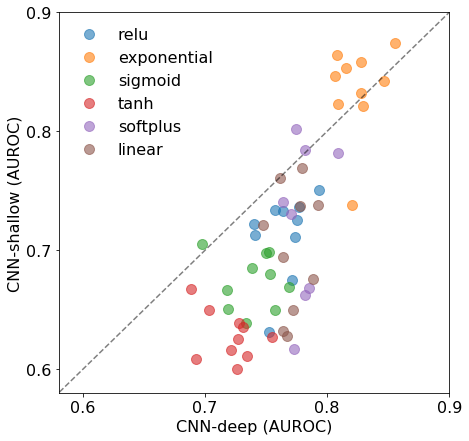

In [62]:
score_name = 'saliency_scores1'
model_name = 'task2-cnn-shallow'
vals = []
for activation in activations:
    name = model_name+'_'+activation
    vals.append(results[name][score_name][0])
    
model_name = 'task2-cnn-deep'
vals2 = []
for activation in activations:
    name = model_name+'_'+activation
    vals2.append(results[name][score_name][0])

fig = plt.figure(figsize=(7,7))
for i in range(len(vals)):
    ax = plt.scatter(vals[i], vals2[i], alpha=0.6, s=100)
plt.legend(activations, fontsize=16, frameon=False)
plt.plot([0.35, 0.9], [0.35, 0.9], '--k', alpha=0.5)
plt.xticks([0.4, 0.5, 0.6, 0.7, 0.8, 0.9], fontsize=16)
plt.yticks([0.4, 0.5, 0.6, 0.7, 0.8, 0.9], fontsize=16)
plt.ylim(0.58, 0.9)
plt.xlim(0.58, 0.9)
plt.ylabel('CNN-shallow (AUROC)', fontsize=16)
plt.xlabel('CNN-deep (AUROC)', fontsize=16)
outfile = os.path.join(results_path, 'task2_compare_cnn_attr_score')
fig.savefig(outfile, format='pdf', dpi=200, bbox_inches='tight')

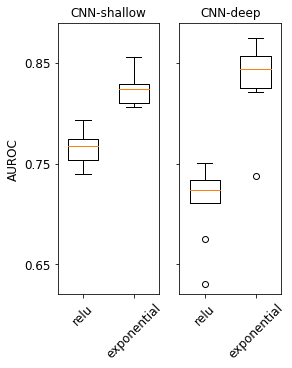

In [84]:
plot_activations =  ['relu', 'exponential']

fig = plt.figure(figsize=(4,5))
ax = plt.subplot(1,2,1)
score_name = 'saliency_scores1'
model_name = 'task2-cnn-shallow'
vals = []
for activation in plot_activations:
    name = model_name+'_'+activation
    vals.append(results[name][score_name][0])
    
ax.boxplot(vals,  widths = 0.6);
plt.ylabel('AUROC', fontsize=12)
plt.yticks([0.65, 0.75, 0.85], fontsize=12)
plt.xticks(range(1,3), plot_activations, fontsize=12, rotation=45)
ax.set_ybound([.62,0.89])
plt.title('CNN-shallow', fontsize=12)

ax = plt.subplot(1,2,2)
model_name = 'task2-cnn-deep'
vals2 = []
for activation in plot_activations:
    name = model_name+'_'+activation
    vals2.append(results[name][score_name][0])
    
ax.boxplot(vals2,  widths = 0.6);
#plt.ylabel('AUROC', fontsize=12)
plt.yticks([0.65, 0.75, 0.85], fontsize=12)
ax.tick_params(labelleft=False) 
plt.xticks(range(1,3), plot_activations, fontsize=12, rotation=45);
ax.set_ybound([.62,0.89])
plt.title('CNN-deep', fontsize=12)
outfile = os.path.join(results_path, 'task2_compare_attr_score_relu_exp')
fig.savefig(outfile, format='pdf', dpi=200, bbox_inches='tight')
